# **House Price Prediction**
* **Data Acquisition**
* **Data Preparation**
* **Exploratory Data Analysis (EDA)**
* **Data Modeling**

## *Data Acquisition*

In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/house-price-dataset/Participants_Data_HPP/Train.csv')

In [3]:
data.shape

(29451, 12)

In [4]:
data.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


## *Data Preparation*

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
data.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [8]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [9]:
data.isnull().sum()
#there is no null value that means we do not need to do Imputation or to drop the missing value column

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [10]:
#Top 10 highest price
data.nlargest(n=10, columns='TARGET(PRICE_IN_LACS)')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
11238,Dealer,0,0,3,BHK,1.875000e+08,1,1,"R.T. Nagar,Bangalore",13.018900,77.596300,30000.0
10745,Owner,0,0,3,BHK,2.545455e+08,1,1,"Malur,Bangalore",13.021000,77.938000,28000.0
15724,Owner,0,0,2,BHK,8.064516e+07,1,1,"Lakkasandra,Bangalore",12.795926,77.331535,25000.0
5967,Dealer,1,1,2,BHK,5.422570e+04,0,0,"Thane West,Lalitpur",19.180000,72.963330,9990.0
10637,Dealer,1,1,3,BHK,8.322835e+04,0,0,"Chinchwad,Pune",18.627000,73.782900,9910.0
3754,Dealer,1,1,1,BHK,4.272398e+04,0,0,"Kanjur Marg (East),Maharashtra",18.960000,72.820000,9900.0
9799,Dealer,1,1,2,BHK,4.968975e+04,0,0,"Laxmi Nagar,Mumbai",22.281215,70.789479,9850.0
14519,Dealer,0,1,1,BHK,4.377345e+04,1,0,"Hiranandani Estate,Lalitpur",19.255098,72.981527,9800.0
15225,Dealer,0,0,3,BHK,1.652321e+05,1,0,"Sector-150 Noida,Noida",28.429614,77.481711,9790.0
4520,Dealer,1,1,3,BHK,1.394286e+05,0,0,"Sector-150 Noida,Noida",28.429614,77.481711,9760.0


In [11]:
data[["CITY", "STATE"]] = data["ADDRESS"].str.split(",", n=1, expand=True)

In [12]:
#We will transform the categorical values to numerical values using LabelEncoder()
label_encoder = LabelEncoder()

data['POSTED_BY'] = label_encoder.fit_transform(data['POSTED_BY'])
data['BHK_OR_RK'] = label_encoder.fit_transform(data['BHK_OR_RK'])
data["CITY"] = label_encoder.fit_transform(data["CITY"])
data ["STATE"] = label_encoder.fit_transform(data['STATE'])


In [13]:
data.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,STATE
count,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,1.336695,0.179756,0.317918,2.392279,0.000815,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746,3023.032359,279.441887
std,0.515345,0.383991,0.465675,0.879091,0.028536,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713,1691.898614,70.437217
min,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000,1630.000000,211.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000,2973.000000,304.000000
75%,2.000000,0.000000,1.000000,3.000000,0.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000,4449.000000,322.000000
max,2.000000,1.000000,1.000000,20.000000,1.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000,5883.000000,444.000000


In [14]:
#Address column is not needed, therefor we can drop it
EDAdata = data.drop('ADDRESS', axis = 1)

In [15]:
EDAdata.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,STATE
0,2,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,2414,178
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,5593,324
2,2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,1934,178
3,2,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,4339,238
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,3275,296
5,2,0,0,3,0,1250.000000,1,1,10.033280,76.282571,42.0,4956,294
6,1,0,0,3,0,1495.053957,1,1,26.916347,75.795600,66.5,4937,266
7,2,0,1,3,0,1181.012946,1,1,30.740000,76.650000,52.0,2288,319
8,1,0,1,2,0,1040.000000,1,1,13.054202,77.674002,41.6,744,178
9,2,0,1,2,0,879.120879,1,1,12.951610,80.140970,36.0,1024,211


## *Exploratory Data Analysis (EDA)*

* The goal is to explore, understand, and summarize the main characteristics of the data.
- Helps in uncovering patterns, detecting anomalies, testing hypotheses, and gaining insights that guide further analysis or model selection.

In [16]:
#Importing Necessary Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### When analyzing a correlation heatmap, you're essentially exploring how strongly different pairs of variables are related to each other.

 **Range: Correlation values range from -1 to +1.**
* +1: Perfect positive correlation (as one variable increases, the other increases).
* 0: No correlation (no linear relationship between the variables).
* -1: Perfect negative correlation (as one variable increases, the other decreases).

<Axes: >

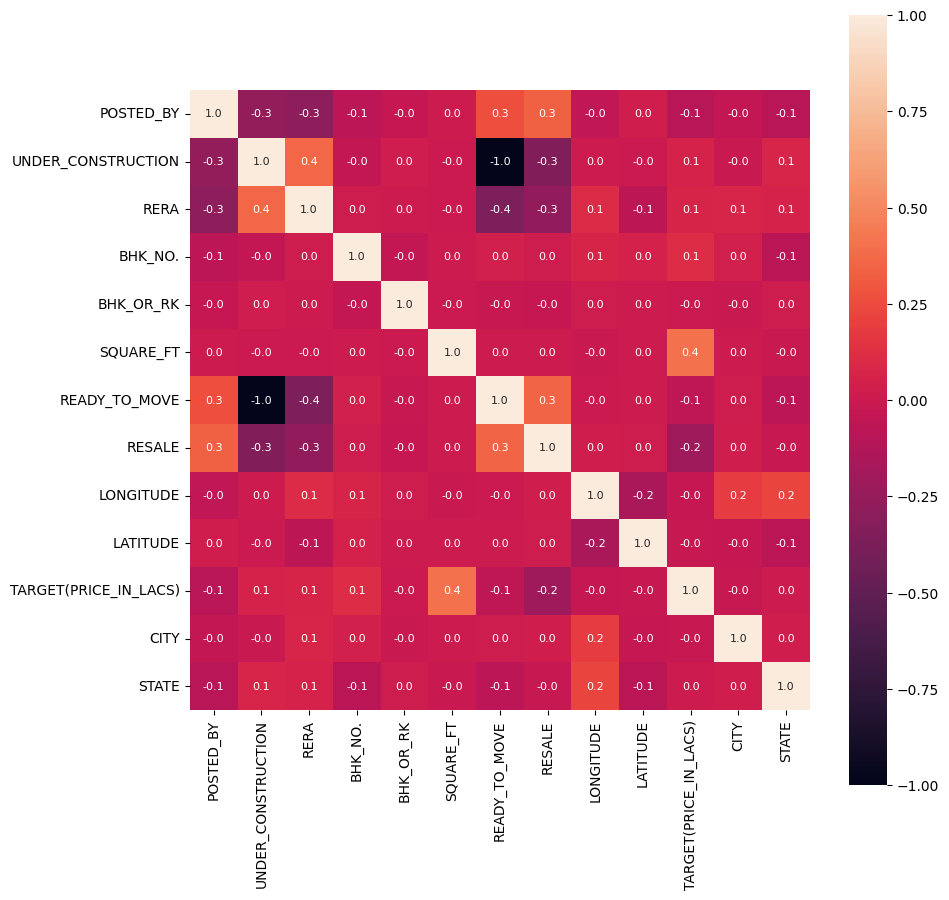

In [17]:
#Correlation
correlation =EDAdata.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8})

### Scatter matrix
A scatter matrix plot to visualize pairwise relationships between features in the dataset. A scatter matrix (or pair plot) is useful for understanding how variables 
are related to each other, and it includes both scatter plots and histograms for each feature.



#### What the Scatter Matrix Does:
- Scatter Plots: The scatter matrix will display pairwise scatter plots between all numerical variables in the dataset. This helps in visualizing the relationships between different features.
- Histograms: Along the diagonal, you'll see histograms of individual features, showing their distribution.
- Interpretation: You can visually inspect relationships, such as:
    - Positive or negative linear relationships (indicating correlation).
    - Patterns, clusters, or outliers between feature pairs.


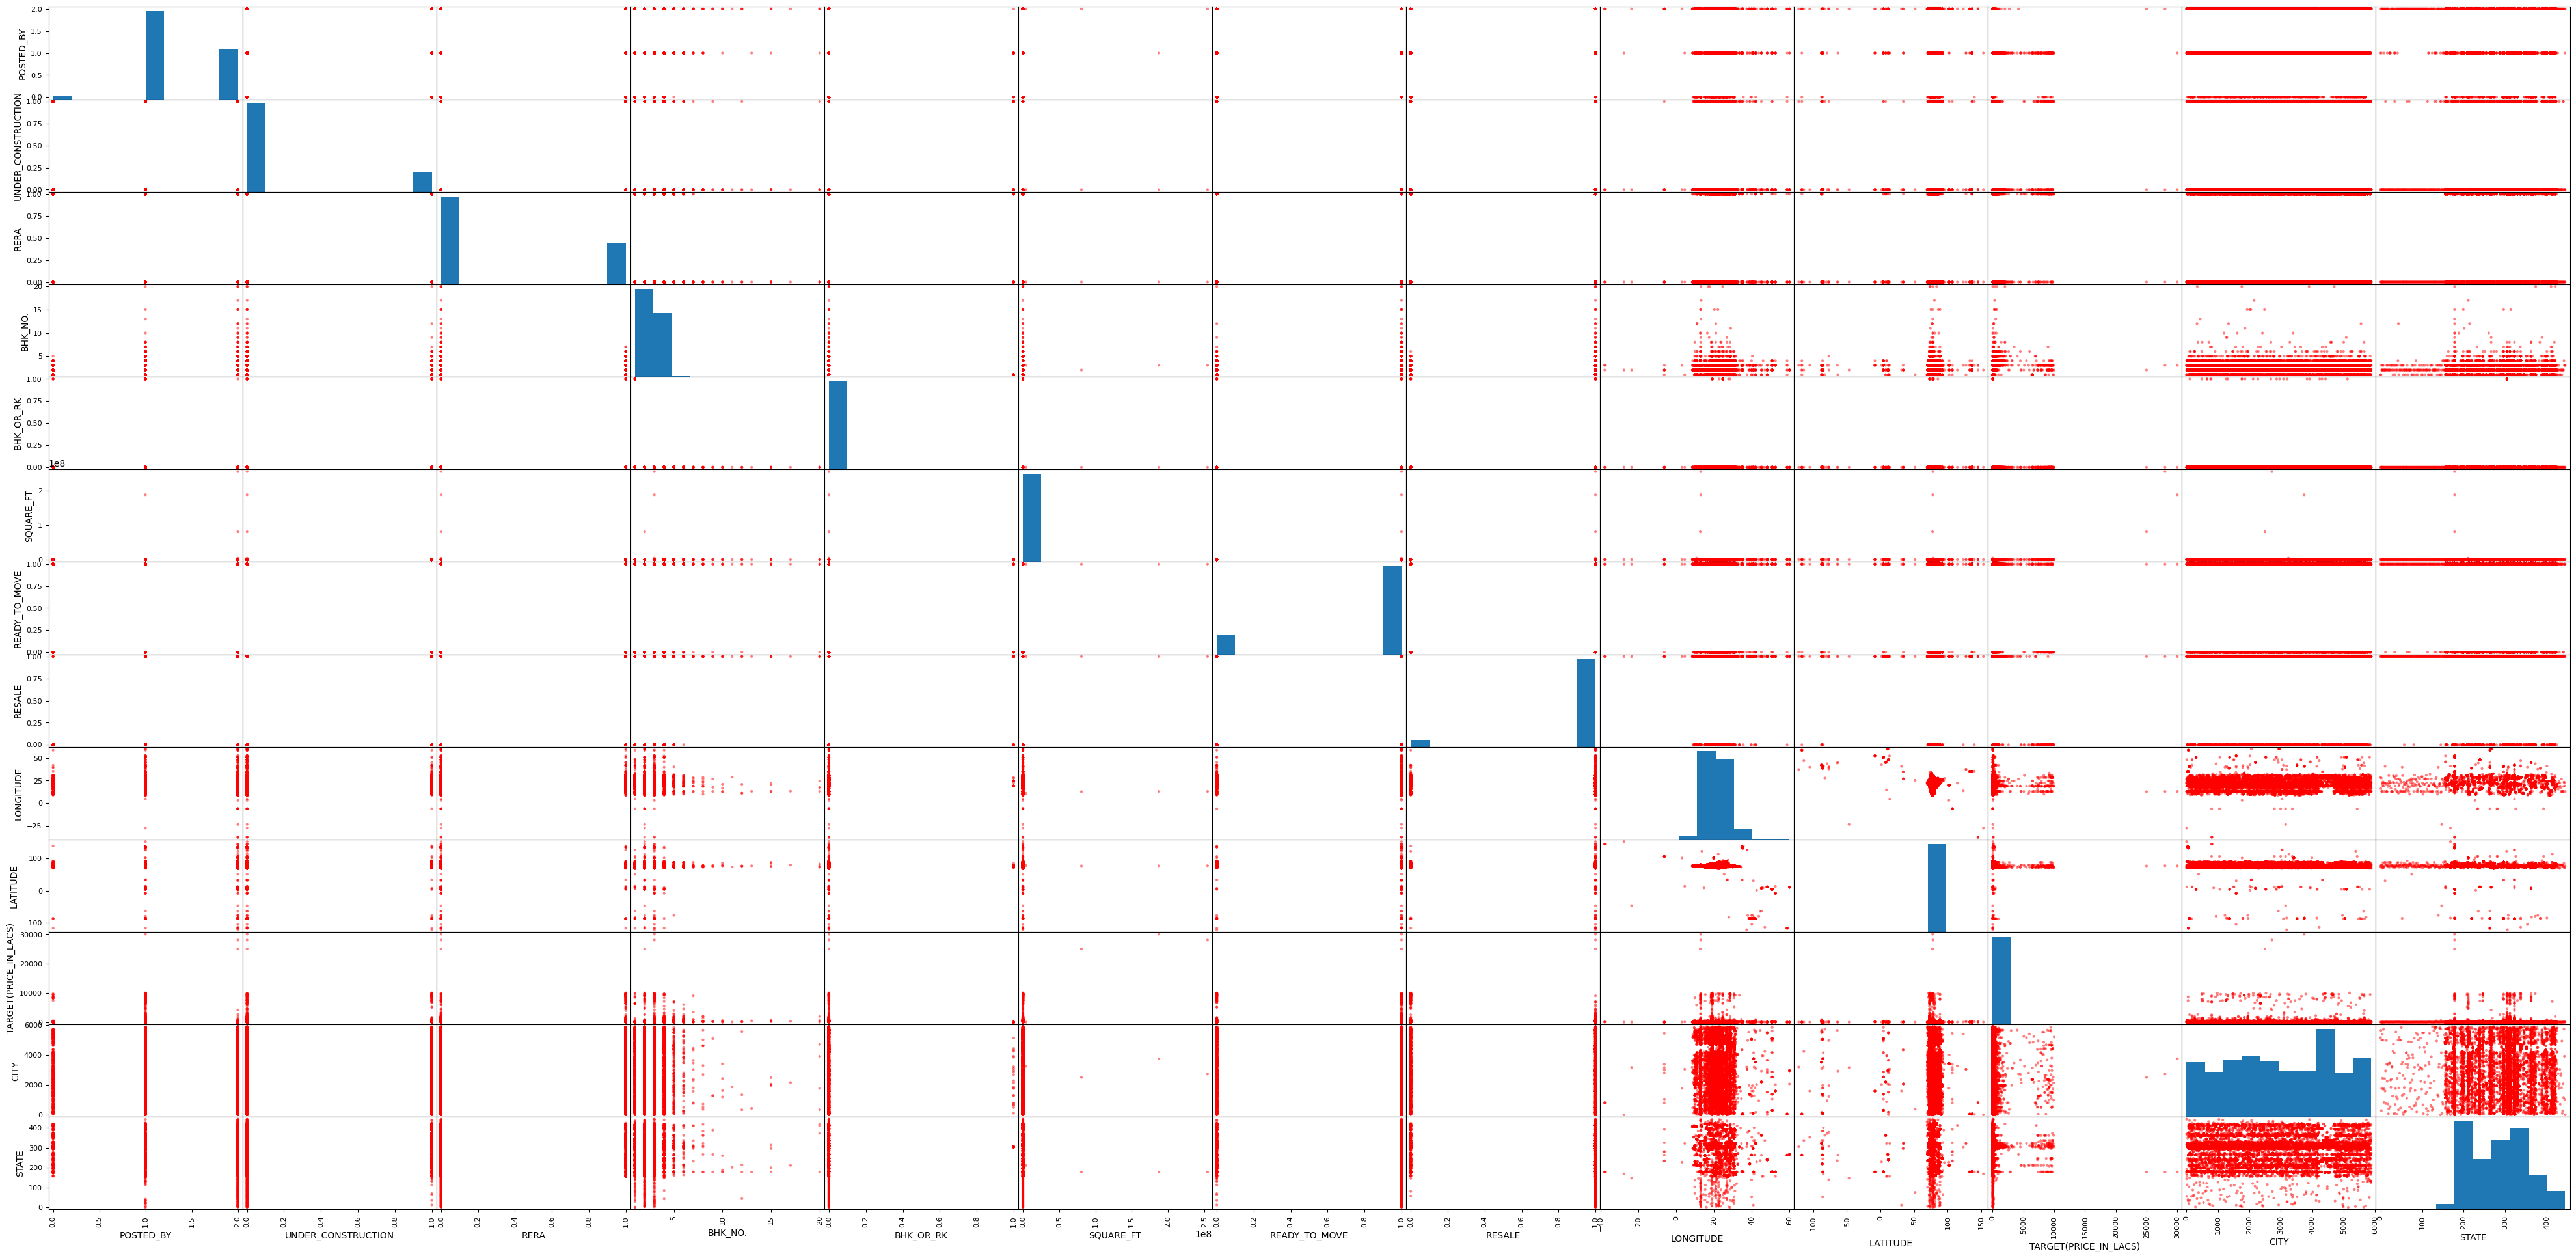

In [18]:
# Scatter matrix (pair plot)
pd.plotting.scatter_matrix(data, color="red", figsize=(50, 24))  # Set figsize inside the scatter_matrix function

# plt.xticks and plt.yticks don't apply here as this plot generates multiple subplots
plt.show()  # Show the scatter matrix plot

### Scatter Plot
What the Scatter Plot Shows:
- Data Points: Each point on the graph represents a data point where the x-axis is the square footage and the y-axis is the target price (in lacs).
- Trends:
    - Positive Relationship: If the points form an upward trend, it suggests that as the square footage increases, the price also increases.
    - Negative Relationship: A downward trend would suggest that as square footage increases, price decreases (although this is unlikely for house prices).
    - No Clear Relationship: If the points are scattered without any pattern, it suggests that there is little to no linear relationship between square footage and price.
- Analysis:
    - Strong Positive Correlation: If the scatter points are aligned in an upward direction, it suggests a strong positive correlation, meaning larger houses tend to be more expensive.
    - Weak/No Correlation: If the scatter points are randomly distributed with no discernible pattern, it means that square footage might not be a strong predictor of price in the dataset.
    - Outliers: You can identify any points that deviate significantly from the general trend, indicating potential outliers (e.g., extremely large houses with very low prices).
    
What the Trendline Does:
- The red line represents the trend (or regression line), showing whether there is a linear relationship between square footage and price. If the line has a positive slope, it indicates a positive relationship.


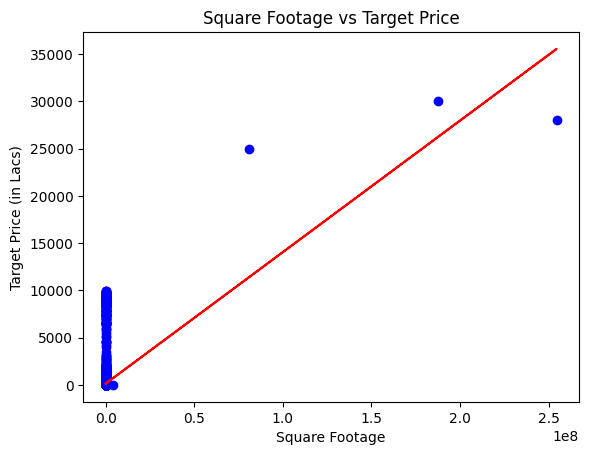

In [19]:
import numpy as np

# Scatter plot
plt.scatter(EDAdata["SQUARE_FT"], EDAdata["TARGET(PRICE_IN_LACS)"], color='blue')
plt.xlabel("Square Footage")
plt.ylabel("Target Price (in Lacs)")
plt.title("Square Footage vs Target Price")

# Add trendline
z = np.polyfit(EDAdata["SQUARE_FT"], EDAdata["TARGET(PRICE_IN_LACS)"], 1)  # 1 for linear trendline
p = np.poly1d(z)
plt.plot(EDAdata["SQUARE_FT"], p(EDAdata["SQUARE_FT"]), color='red')  # Add trendline

plt.show()


### Box Plot

A boxplot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary. It helps in understanding the spread, skewness, and presence of outliers in a dataset.

1. Median (Q2):
    - The line inside the box represents the median (the 50th percentile), which is the middle value of the dataset when ordered from smallest to largest.
2. Interquartile Range (IQR):
    - The box itself spans from the first quartile (Q1) to the third quartile (Q3). This range is known as the interquartile range (IQR), which contains the middle 50% of the data.
        - Q1 (25th percentile): The value below which 25% of the data falls.
        - Q3 (75th percentile): The value below which 75% of the data falls.
3. Whiskers:
    - The whiskers extend from the edges of the box to the smallest and largest data points that are not considered outliers.
    - Typically, whiskers extend to 1.5 times the IQR below Q1 and above Q3.
4. Outliers:
    - Any data points that fall outside 1.5 times the IQR are considered outliers and are plotted as individual points.
    - Outliers are represented as dots or circles outside the whiskers.
    
  ![img](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/fig/fig04-5-2-1-eng.png)

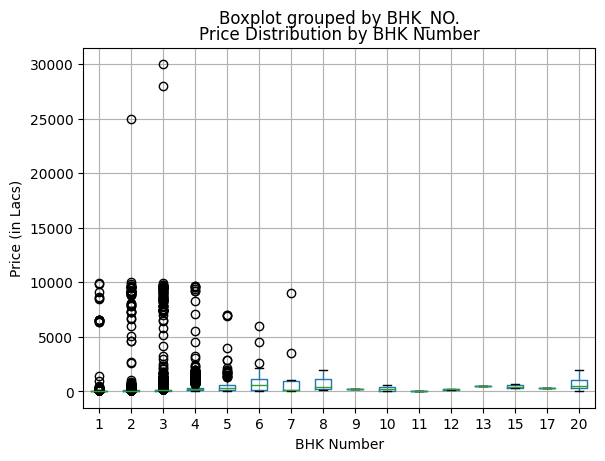

In [20]:
# Create a box plot of price by BHK number
EDAdata.boxplot(column='TARGET(PRICE_IN_LACS)', by='BHK_NO.')
plt.title('Price Distribution by BHK Number')
plt.xlabel('BHK Number')
plt.ylabel('Price (in Lacs)')
plt.show()

### Below Scatter Plot analysis
- Geographical Trends:
    - You can identify areas where property prices are higher or lower by looking at clusters of points with similar colors.
    - For example, if the points in certain areas are darker (higher price), it suggests that properties in that region are more expensive.
    - Conversely, lighter-colored clusters indicate lower-priced properties.

- Location-Based Insights:
    - The plot allows you to see if there’s a clear relationship between location (longitude and latitude) and property prices. For instance, certain areas may have consistently higher or lower prices.
    - It can help spot regions with outliers, such as a single expensive property in an otherwise affordable area.

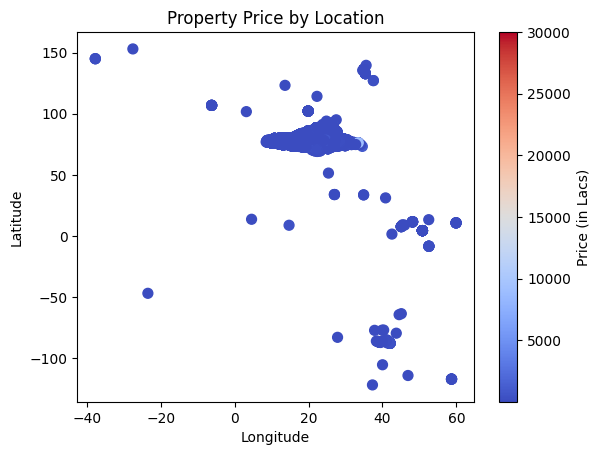

In [21]:
# plt.scatter(EDAdata['LONGITUDE'], EDAdata['LATITUDE'], c=EDAdata['TARGET(PRICE_IN_LACS)'])
plt.scatter(EDAdata['LONGITUDE'], EDAdata['LATITUDE'], c=EDAdata['TARGET(PRICE_IN_LACS)'], s=50, marker='o', cmap='coolwarm')
# plt.scatter(EDAdata['LONGITUDE'], EDAdata['LATITUDE'], c=EDAdata['TARGET(PRICE_IN_LACS)'], cmap='viridis')
plt.title('Property Price by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price (in Lacs)')
plt.show()

#### Number of Houses in Each State
- EDAdata['STATE'].value_counts(): This counts the occurrences of each state (i.e., how many times each state appears in the dataset). It’s a simpler way to count entries compared to using groupby.
- state_counts.index: These are the unique state names.
- state_counts.values: These are the number of houses (counts) in each state.
- plt.xticks(rotation=45): Rotates the x-axis labels to prevent overlap if there are many states.

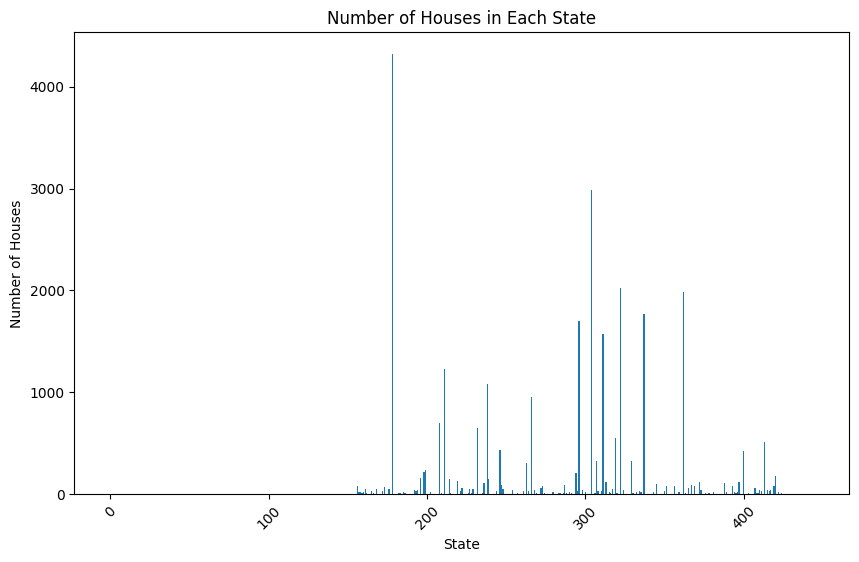

In [22]:
# Group the data by state and count the number of houses in each state
state_counts = EDAdata.groupby("STATE")["STATE"].count()

# Sort the counts by state names to maintain a consistent order
state_counts = state_counts.sort_index()

# Plot a bar chart for number of houses per state
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel("State")
plt.ylabel("Number of Houses")
plt.title("Number of Houses in Each State")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


#### Ploting the readiness by, number of bedrooms

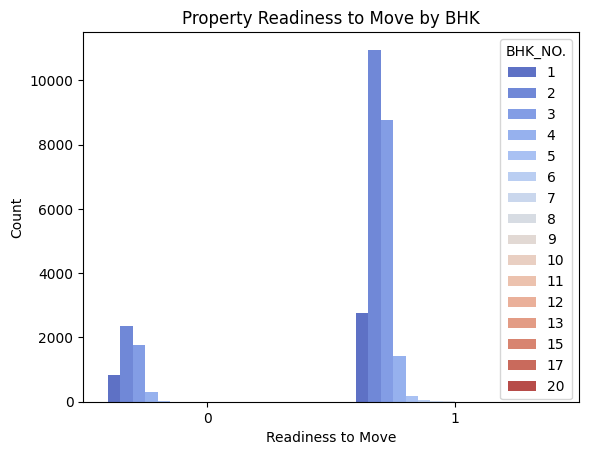

In [23]:
sns.countplot(x='READY_TO_MOVE', data=EDAdata, hue='BHK_NO.', palette='coolwarm')
plt.title('Property Readiness to Move by BHK')
plt.xlabel('Readiness to Move')
plt.ylabel('Count')
plt.show()


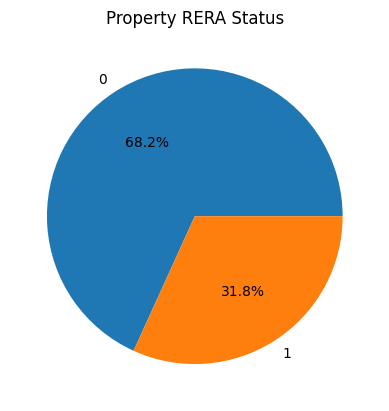

In [24]:
#  Under RERA, any structural defect that takes place to the property for up to five years from the date of handing over possession
# will have to be repaired by the developer.
# RERA == 1 means RERA certificate approved

counts = EDAdata['RERA'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Property RERA Status')
plt.show()

## *Data Modeling*

In [25]:
#Normalizing som columns
scaler = StandardScaler()
trainData = EDAdata
trainData[['LONGITUDE','LATITUDE','SQUARE_FT']] = scaler.fit_transform(trainData[['LONGITUDE','LATITUDE','SQUARE_FT']])

In [26]:
#Spliting the data into features and target
X = trainData.drop('TARGET(PRICE_IN_LACS)', axis = 1)
y = trainData['TARGET(PRICE_IN_LACS)']

In [27]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [28]:
#Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

### Linear Regression Model

In [29]:
#Building and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
#Predicting the House Price rent on test data
y_pred = model.predict(X_test)

In [31]:
# Evaluating the mode
print(mean_squared_error(y_test,y_pred))

325562.257834145


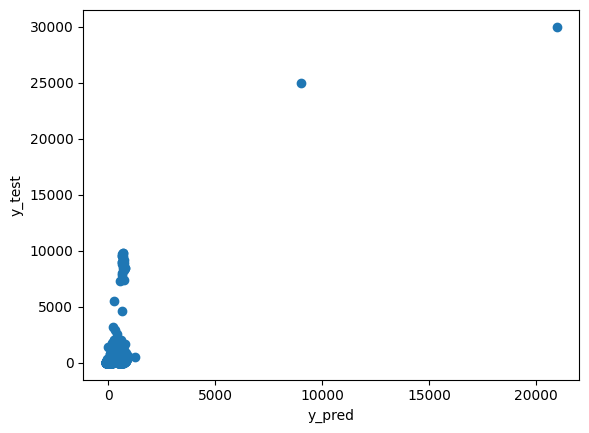

In [32]:
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

### Support Vector Regressor model

Support Vector Regression (SVR) is a machine learning technique used for regression tasks. It is a variant of Support Vector Machines (SVM) and is designed to predict continuous numeric values, making it suitable for tasks like time series forecasting, stock price prediction, and more.

#### Key points about SVR:

- Objective: SVR aims to find a function that predicts a continuous target variable while maximizing the margin between the predicted values and the actual data points.
- Margin: SVR identifies a “margin” around the predicted regression line, and its goal is to fit the line within this margin while minimizing the prediction error.
- Support Vectors: In SVR, data points that are closest to the regression line and define the margin are known as “support vectors.” These points play a crucial role in determining the regression model.
- Kernel Trick: SVR can use various kernel functions (e.g., linear, polynomial, radial basis function) to transform the feature space, making it possible to model non-linear relationships between input features and the target variable.
- Hyperparameters: SVR requires tuning hyperparameters, such as the regularization parameter (c ) and kernel parameters, to achieve the best model performance.
- Loss Function: SVR typically uses an epsilon-insensitive loss function that allows for some errors within a defined range (epsilon), and it penalizes errors outside this range more heavily.
- Complexity Control: The regularization parameter (c ) in SVR controls the trade-off between maximizing the margin and minimizing the prediction error. A smaller C leads to a wider margin with more errors allowed, while a larger C results in a narrower margin with fewer errors allowed.
- Robustness: SVR is robust to outliers, as it primarily focuses on the data points close to the margin (support vectors) and doesn’t heavily rely on all data points.


In [33]:
#SVM model
from sklearn.svm import SVR

svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

SVR()

In [37]:
#pred on the training and validation sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

In [40]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training set:")
print("Mean Squared Error:", train_mse)

print("Validation set:")
print("Mean Squared Error:", test_mse)

Training set:
Mean Squared Error: 409793.5111401179
Validation set:
Mean Squared Error: 551119.4222010609


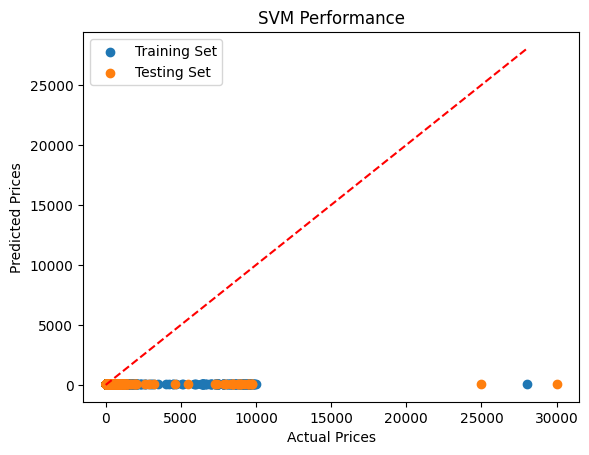

In [42]:
# Plotting the results
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, label="Training Set")
ax.scatter(y_test, y_test_pred, label="Testing Set")
ax.plot([0, max(y_train)], [0, max(y_train)], 'r--')
ax.set_xlabel("Actual Prices")
ax.set_ylabel("Predicted Prices")
ax.set_title("SVM Performance")
ax.legend()
plt.show()
